In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_blobs


In [2]:
X,y = make_blobs(n_samples=1000,centers = 3,n_features=2,random_state = 23)

In [3]:
X.shape

(1000, 2)

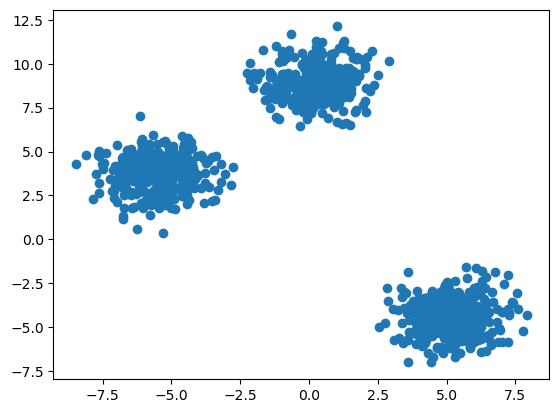

In [4]:
plt.scatter(X[:,0],X[:,1])

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)

In [6]:
from sklearn.cluster import KMeans

In [7]:
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k,init = 'k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

In [8]:
wcss

[38942.19694117094,
 8820.694152589955,
 1475.4321389025877,
 1271.5689424546558,
 1097.8705941790304,
 956.5628493600742,
 847.8252416395877,
 743.2045012988881,
 643.6322797055249,
 593.5274328038624]

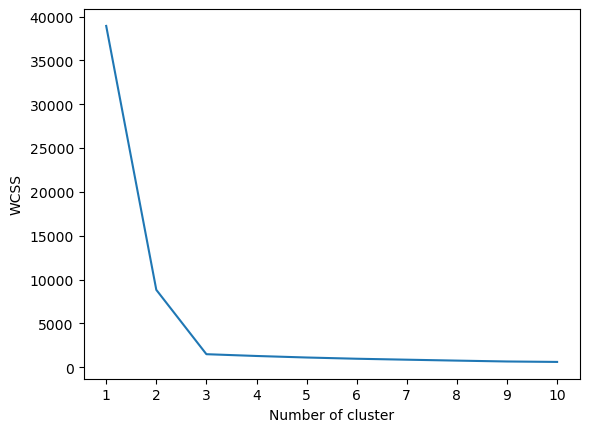

In [9]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of cluster")
plt.ylabel("WCSS")
plt.show()

In [10]:
kmeans = KMeans(n_clusters = 3,init = 'k-means++')

In [11]:
y_labels = kmeans.fit_predict(X_train)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [12]:
y_test_label = kmeans.predict(X_test)

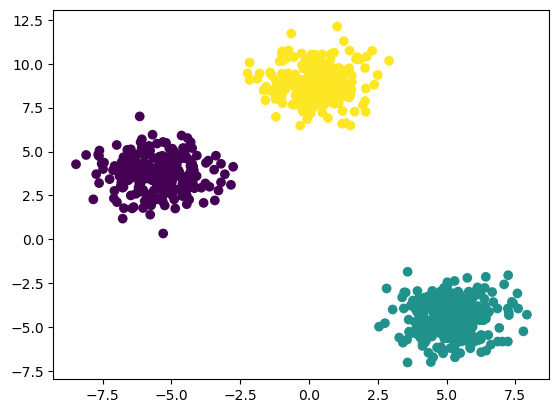

In [13]:
plt.scatter(X_train[:,0],X_train[:,1],c= y_labels)

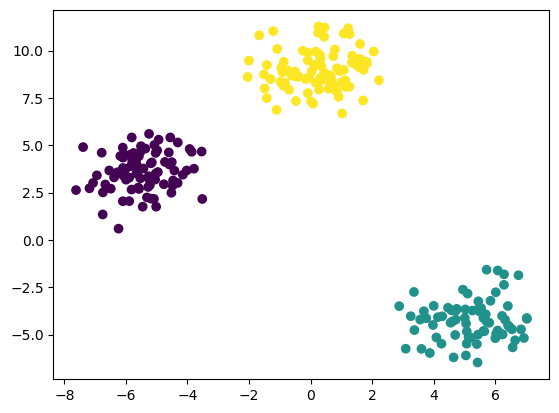

In [14]:
plt.scatter(X_test[:,0],X_test[:,1],c= y_test_label)

In [21]:
!pip install kneed

In [24]:
from kneed import KneeLocator
kl = KneeLocator(range(1,11),wcss,curve= 'convex',direction = 'decreasing')
kl.elbow

3

In [27]:
from sklearn.metrics import silhouette_score

In [28]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train)
    score=silhouette_score(X_train,kmeans.labels_)
    silhouette_coefficients.append(score)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

In [29]:
silhouette_coefficients

[0.7285220879328288,
 0.8070976381014228,
 0.6349275684861594,
 0.484873047588962,
 0.34127025548931866,
 0.3435642773653755,
 0.3441118577068797,
 0.34798634738191175,
 0.34354480856374825]

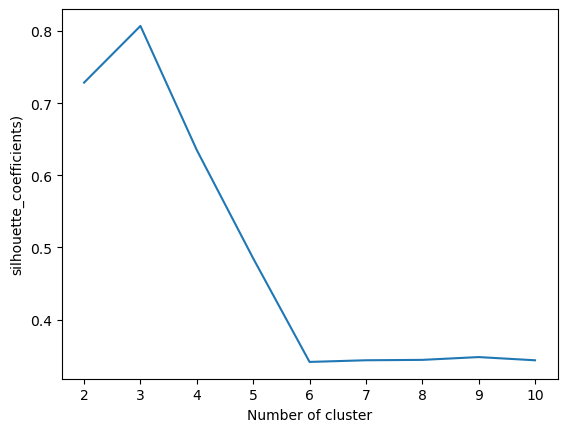

In [32]:
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of cluster")
plt.ylabel("silhouette_coefficients)")
plt.show()